In [1]:
import sys
sys.path.append('../../zero_tsuku')
from common.trainer import Trainer
from common.optimizer import Adam
from word2vec import SimpleCBOW
from common.util import preprocess,convert_one_hot
sys.path.append('../../')
from preparation.word2vec_preparation.create_contexts_target import create_contexts_target

In [2]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

| epoch 451 |  iter 1 / 2 | time 0[s] | loss 0.45
| epoch 452 |  iter 1 / 2 | time 0[s] | loss 0.73
| epoch 453 |  iter 1 / 2 | time 0[s] | loss 0.57
| epoch 454 |  iter 1 / 2 | time 0[s] | loss 0.62
| epoch 455 |  iter 1 / 2 | time 0[s] | loss 0.73
| epoch 456 |  iter 1 / 2 | time 0[s] | loss 0.50
| epoch 457 |  iter 1 / 2 | time 0[s] | loss 0.62
| epoch 458 |  iter 1 / 2 | time 0[s] | loss 0.72
| epoch 459 |  iter 1 / 2 | time 0[s] | loss 0.50
| epoch 460 |  iter 1 / 2 | time 0[s] | loss 0.66
| epoch 461 |  iter 1 / 2 | time 0[s] | loss 0.56
| epoch 462 |  iter 1 / 2 | time 0[s] | loss 0.54
| epoch 463 |  iter 1 / 2 | time 0[s] | loss 0.67
| epoch 464 |  iter 1 / 2 | time 0[s] | loss 0.60
| epoch 465 |  iter 1 / 2 | time 0[s] | loss 0.49
| epoch 466 |  iter 1 / 2 | time 0[s] | loss 0.77
| epoch 467 |  iter 1 / 2 | time 0[s] | loss 0.59
| epoch 468 |  iter 1 / 2 | time 0[s] | loss 0.66
| epoch 469 |  iter 1 / 2 | time 0[s] | loss 0.60
| epoch 470 |  iter 1 / 2 | time 0[s] | loss 0.48


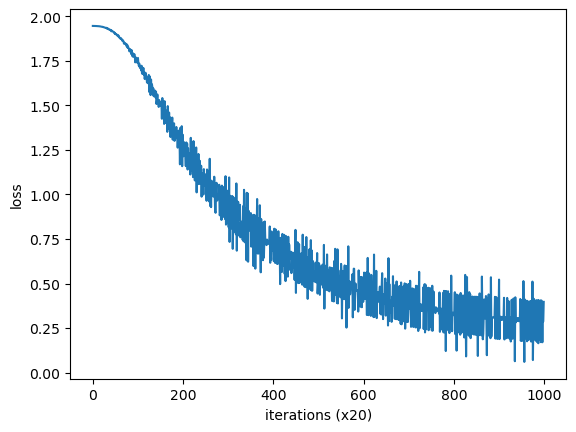

In [3]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [4]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [-1.5012115 -0.8995996  0.9401284  0.9593925  1.4112153]
say [-1.241848    1.2268084  -1.2118547  -1.0332398   0.23138347]
goodbye [ 0.5484363  -1.1124389   1.0744159   1.177075   -0.40235978]
and [-0.61666834  0.9004163  -0.9178652  -1.373315    1.7279524 ]
i [ 0.5447945 -1.1217767  1.0835347  1.1639664 -0.4244411]
hello [-1.5092658  -0.9122471   0.936681    0.93572617  1.419558  ]
. [-1.3616071  1.1886789 -1.209353   1.0725855 -1.6241803]
